# Sample Text Classification 
The exercise was conducted using data from kaggle 
api command: kaggle datasets download -d team-ai/spam-text-message-classification


In [ ]:
import pandas as pd

In [2]:
spam_data = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [3]:
spam_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Category    5572 non-null object
Message     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
spam_data['Message_length'] = spam_data['Message'].apply(len)

In [6]:
spam_data.head()

,Category,Message,Message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

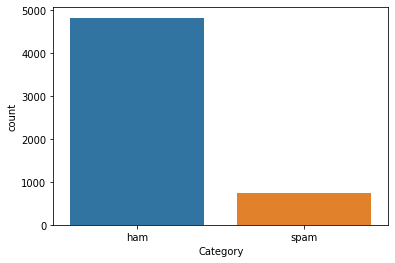

In [8]:
sns.countplot(x='Category' ,data=spam_data)
#spam_data['Message_length'] 

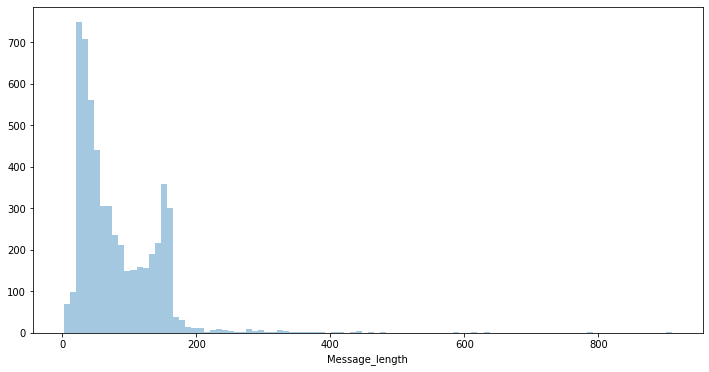

In [9]:
plt.figure(figsize=(12, 6))
sns.distplot(spam_data['Message_length'], bins=100, kde=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9DA20CDD8>,
      dtype=object)

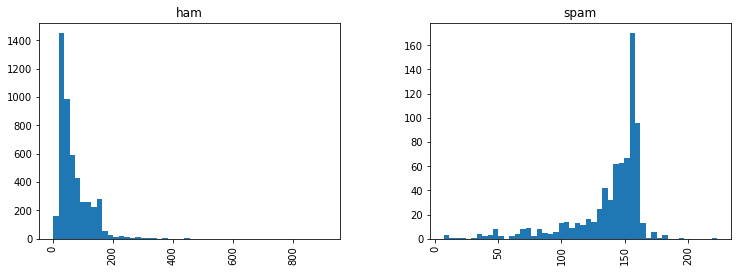

In [10]:
spam_data.hist(column='Message_length', by='Category', bins=50,figsize=(12,4))

# Tekenizing the Data 

In [11]:
x =  spam_data['Message']
y = spam_data['Category']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

# Spliting the data 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# The Model 

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
prediction = nb.predict(x_test)

In [17]:
from sklearn import metrics

In [18]:
print(metrics.confusion_matrix(y_test, prediction))

[[1573   20]
 [  10  236]]


In [19]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1593
        spam       0.92      0.96      0.94       246

    accuracy                           0.98      1839
   macro avg       0.96      0.97      0.97      1839
weighted avg       0.98      0.98      0.98      1839



In [20]:
print(metrics.accuracy_score(y_test, prediction))

0.9836867862969005
